# Diamond Price Prediction

## Introduction About the Data :

The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables:<br>
-__id__ : unique identifier of each diamond<br>
-__carat__ : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.<br>
-__cut__ : Quality of Diamond Cut<br>
-__color__ : Color of Diamond<br>
-__clarity__ : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.<br>
-__depth__ : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)<br>
__table__ : A diamond's table is the facet which can be seen when the stone is viewed face up.<br>
__x__ : Diamond X dimension<br>
__y__ : Diamond Y dimension<br>
__x__ : Diamond Z dimension<br>
__Target variable:__ <br>
-__price__: Price of the given Diamond.<br>

Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv <br>
AGS Diamond Grading System: https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data ingestion
df = pd.read_csv("data\gemstone.csv")

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\man94\AppData\Local\Temp\ipykernel_19932\3357072494.py:2: SyntaxWarning: invalid escape sequence '\g'
  df = pd.read_csv("data\gemstone.csv")


In [11]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
# No null values in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
# There are 3 categorical variables cut, color and clarity. Data encoding is required for these variables
# id column is no use for predicting the price. Lets remove this column

In [3]:
df.drop(labels=['id'], axis=1,inplace=True)

In [13]:
df.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619


In [5]:
df.duplicated().sum()

np.int64(0)

In [11]:
# No duplicate records in the data

In [5]:
# lets separate numerical and categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print("Categorical columns:",categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [13]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [14]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [15]:
df.shape

(193573, 10)

In [16]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

# Insights
### **1. Data Types and Non Null counts:**
- The dataset contains **1,93,573 rows** and **11 columns**. There is **no null and duplicated** values.
   - **Data Types**: There are 2 columns with `int64` data type, 3 columns with `object` data type and 6 columns with `float64` data type.
   - **Numberical Features**: These inlucde features like `carat`, `depth`, `table`, `x`, `y`, `z`, and `price`.
   - **Categorical Features**: These inlucde features like `cut`, `color`, and `clarity`.

### **2. Summary Statistics:**
   - **Numerical Features**:
      - The target variable `Price` has a mean of `$3969.15` with a standard deviation of `$4034.37`, indicating a significant spread in diamond prices. It ranges from `326` to `18818` indicating outliers in the data.
      - `carat` column ranges from `0.2` to `3.5` with the mean of `0.79`. The `75%` of data is under `1`.
      - `depth` coloumn ranges from `52.1` to `71.6` with the mean of `61.8`.
      - `table` coloumn ranges from `49` to `79` with the mean of `57.2`. The `75%` of data is under `58`.

   - **Categorical Features**:
      - `cut` coloumn has `5` unique values with `Ideal` being the most frequent value and dominating this colomn. It appears `92454`times.
      - `color` coloumn has `7` unique values with color `G` being the most frequent value. 
      - `clarity` coloumn has `8` unique values with `8` being the most frequent value.

### **Issues to be Addressed Later**
   1. **Outlier Detection and Handling**:
      - Features like `carat`, `table` and `Price` show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.
   2. **Categorical Encoding**:
   - Categorical features like `cut`, `color`, and `clarity` have many unique values. Decisions need to be made on how to encode these (e.g., one-hot encoding, ordinal encoding).


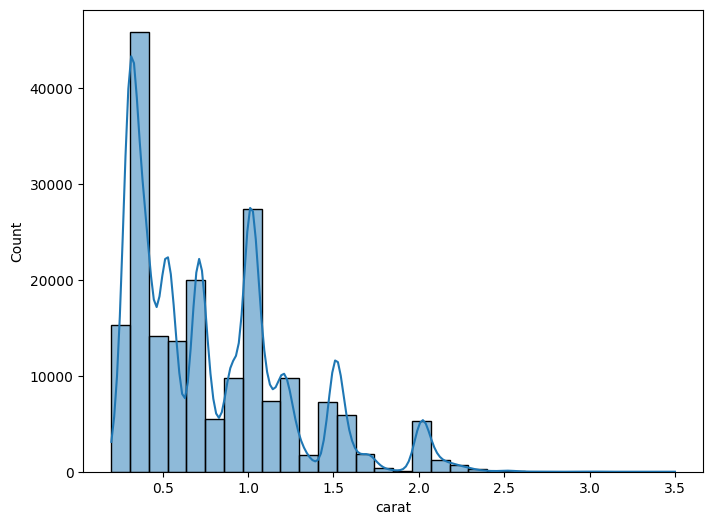

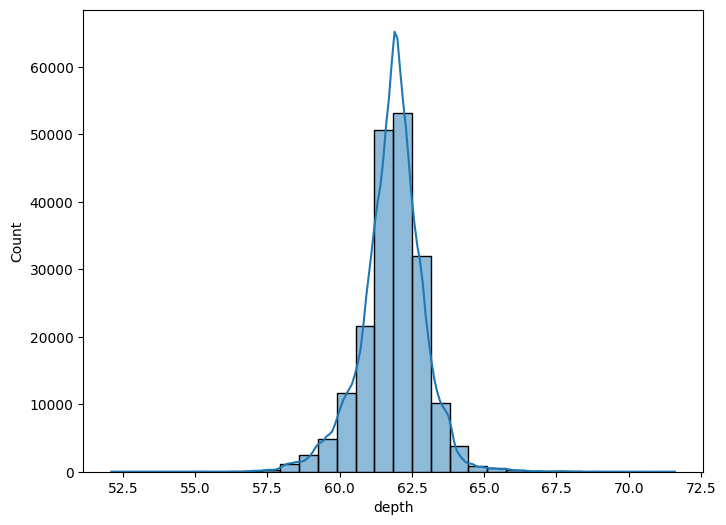

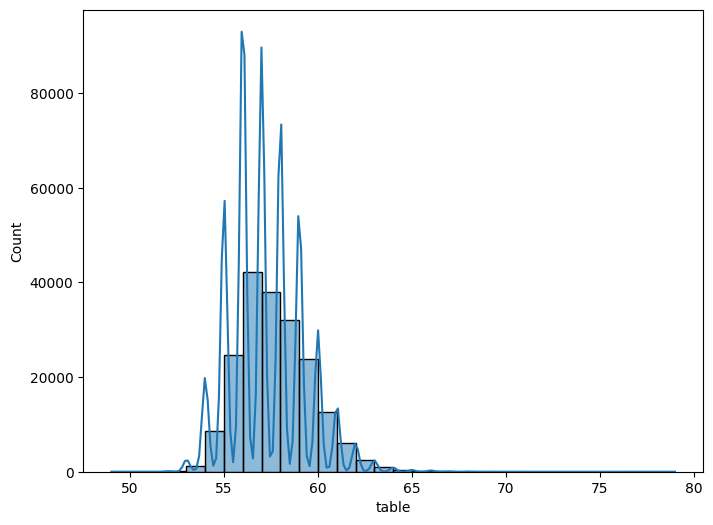

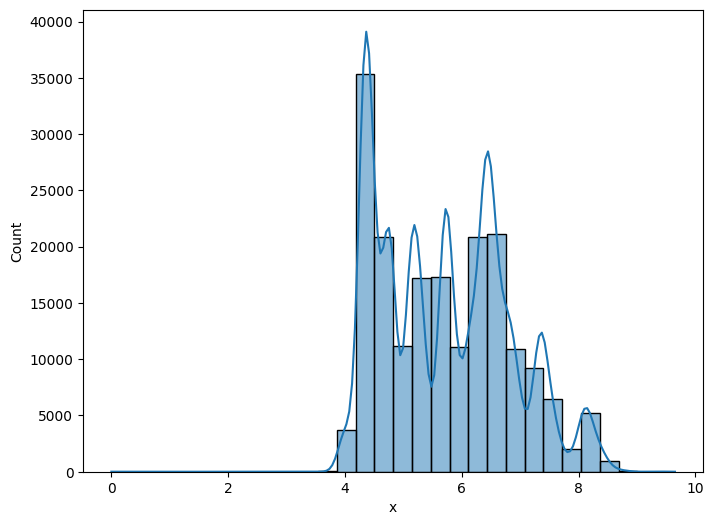

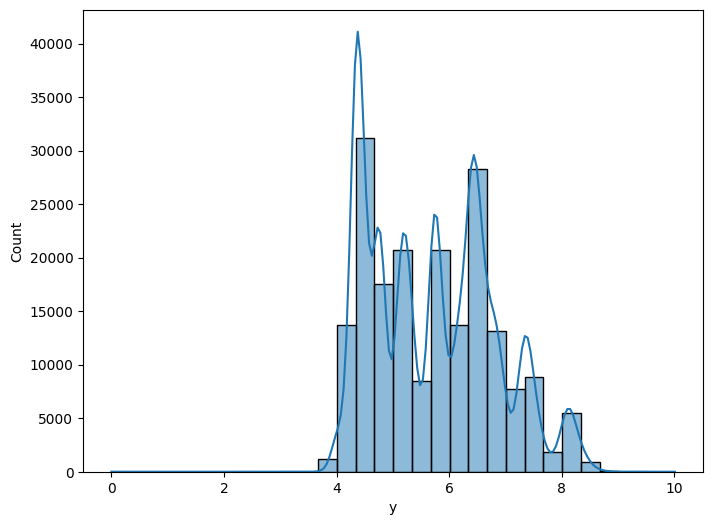

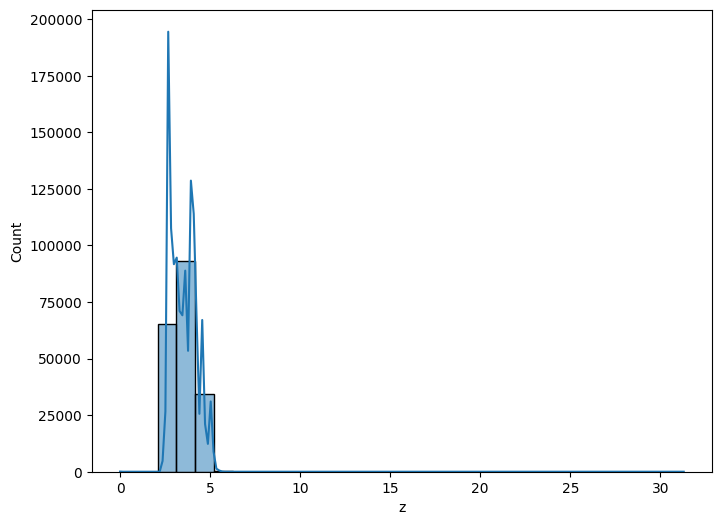

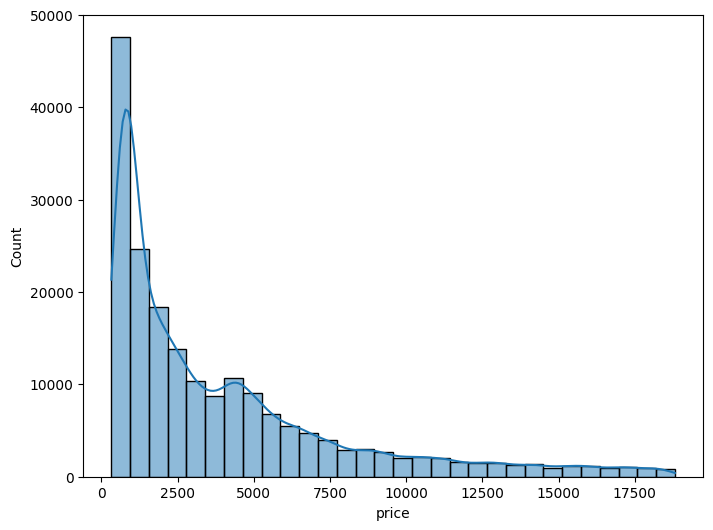

In [22]:
# Univariate analysis
# Analysing Numerical features

for i in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=i,bins = 30,kde=True)

<Axes: xlabel='price', ylabel='Count'>

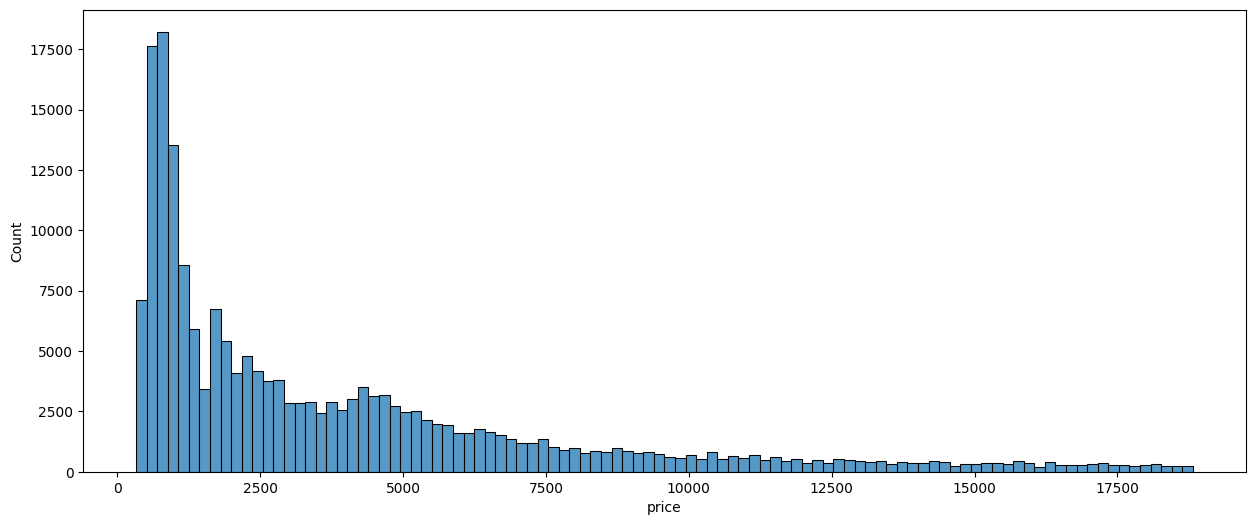

In [30]:
plt.figure(figsize=(15,6))
sns.histplot(df['price'], bins=100)

In [37]:
len(df[df['price']<1000])

51994

<Axes: xlabel='carat'>

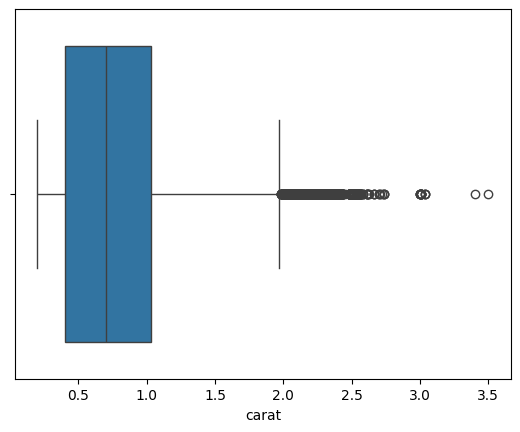

In [28]:
sns.boxplot(x=df['carat'])

In [31]:
# showing many records as outliers. We can consider removing these recors as these are 3.6 % of the data
len(df[df['carat']>2])

6902

In [32]:
# we can consider threshold of carat =2.5 as well
len(df[df['carat']>2.5])

123

<Axes: xlabel='depth'>

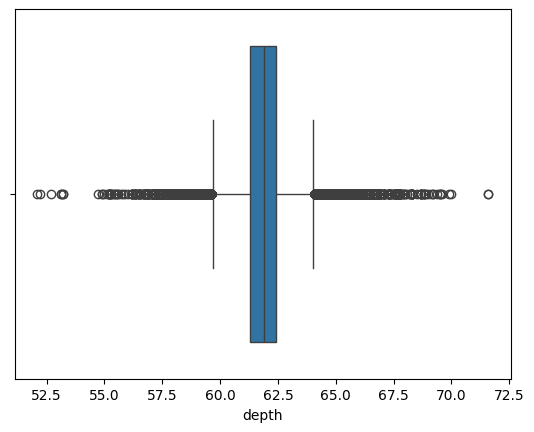

In [33]:
sns.boxplot(x=df['depth'])

In [52]:
# it shows 6270 records as outliers but these seems part of the data. We can consider using a threshold for min and max values to remove fewer outliers
len(df[ ~((df['depth'] > 59) & (df['depth'] < 64 )) ])

6270

<Axes: xlabel='table'>

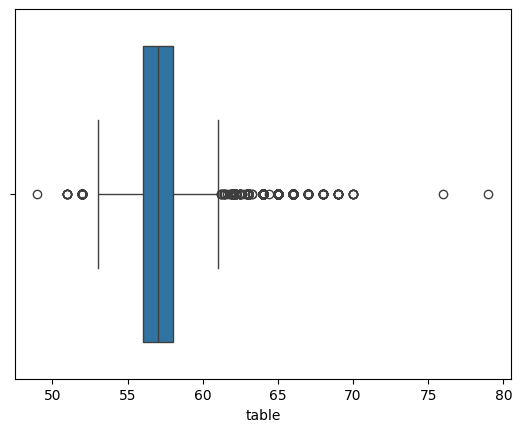

In [54]:
sns.boxplot(x=df['table'])

In [58]:
# it shows approx 20,000 records as outliers. We can consider using a threshold for min and max values to remove fewer outliers
len(df[ ~((df['table'] > 54) & (df['table'] < 61 )) ])

19944

<Axes: xlabel='price'>

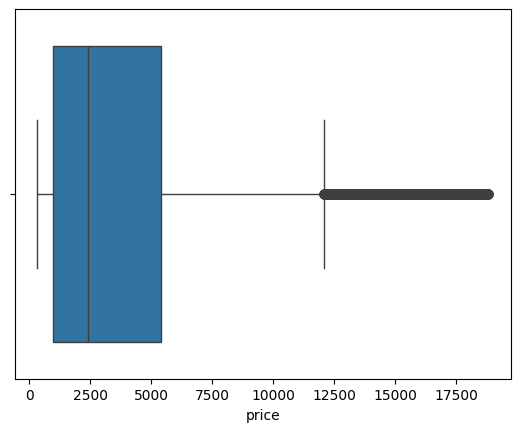

In [59]:
sns.boxplot(x=df['price'])

In [61]:
# It is showing 11682 records as outliers. These are some premium diamonds and we should think about it
len(df[df['price'] > 12500])

11682

In [64]:
len(df[df['price'] > 17000])

2773

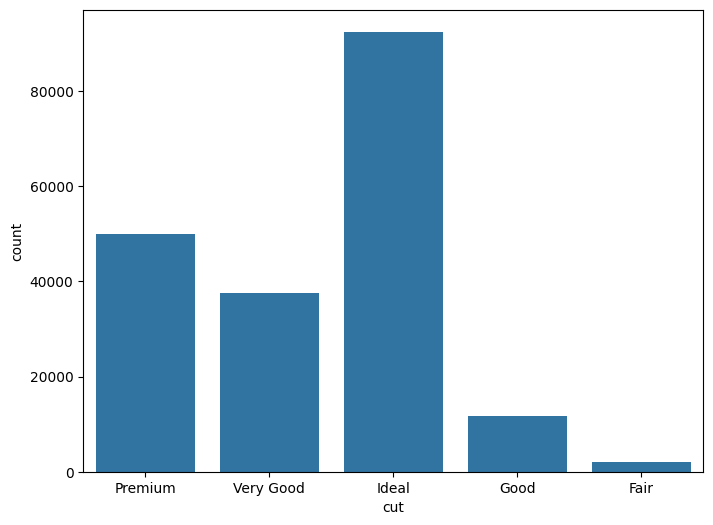

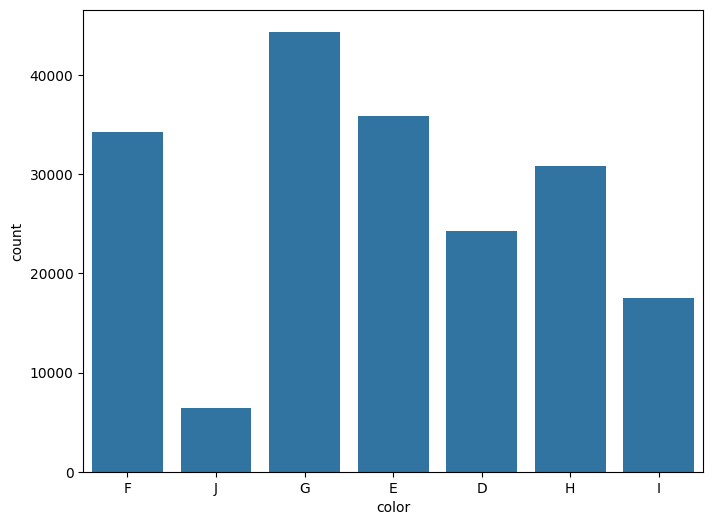

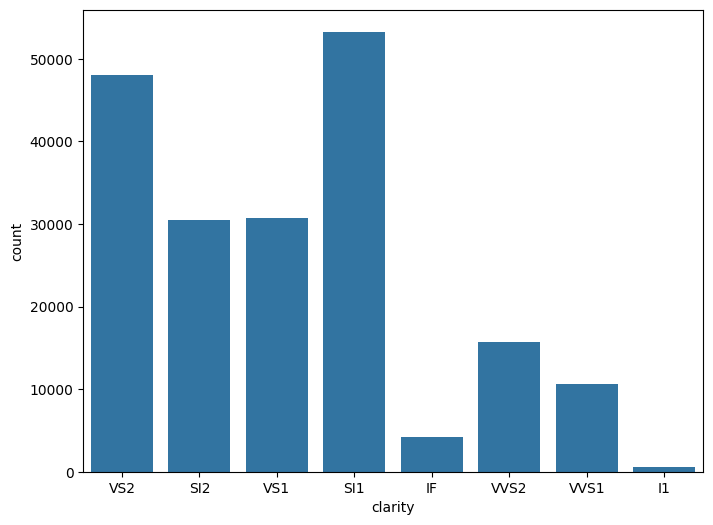

In [62]:
# Analyzing Categorical features
for i in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=i)

<Axes: ylabel='count'>

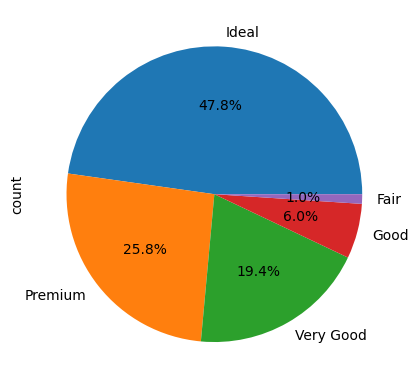

In [67]:
df['cut'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

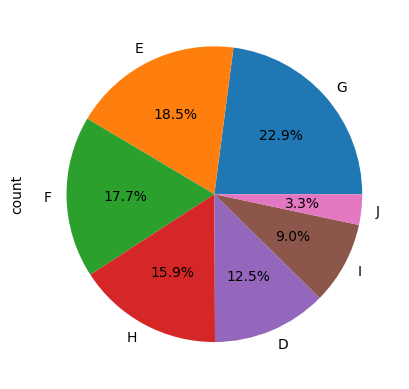

In [68]:
df['color'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: ylabel='count'>

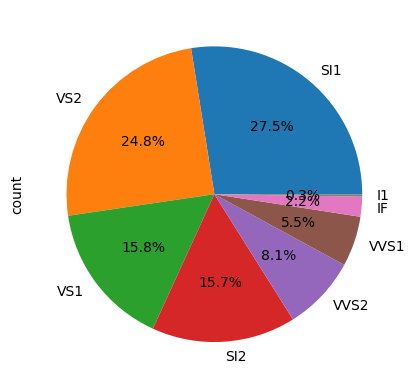

In [69]:
df['clarity'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [71]:
# checking skewness of the columns
for i in numerical_columns:
    print(f'Skewnes of {i} is: {df[i].skew()}')

Skewnes of carat is: 0.9951346140557973
Skewnes of depth is: -0.2763823554971698
Skewnes of table is: 0.6190622303428757
Skewnes of x is: 0.36104977553354245
Skewnes of y is: 0.35675812874618273
Skewnes of z is: 0.6856714832940286
Skewnes of price is: 1.6055811701177636


In [ ]:
# carat and price is highly skew. table and z is also skew

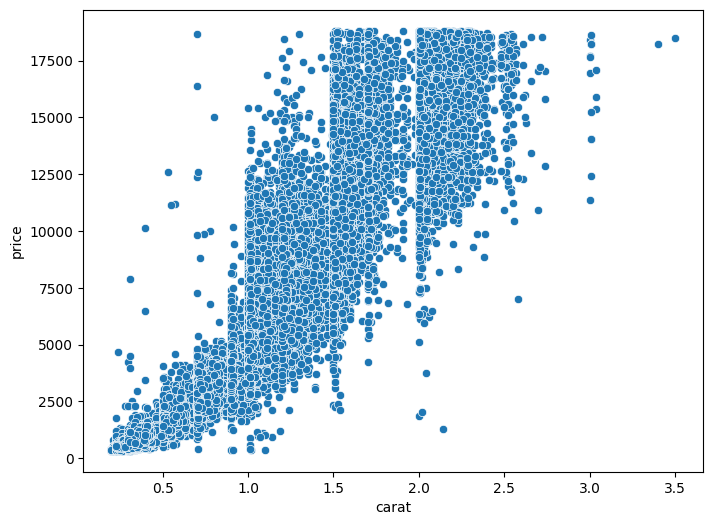

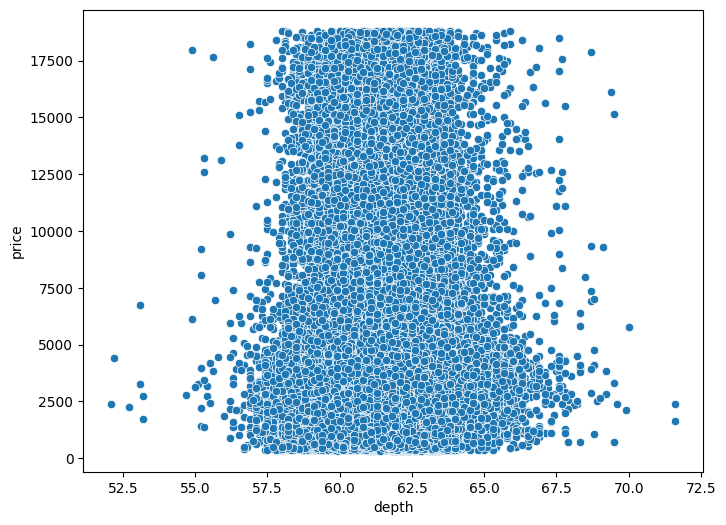

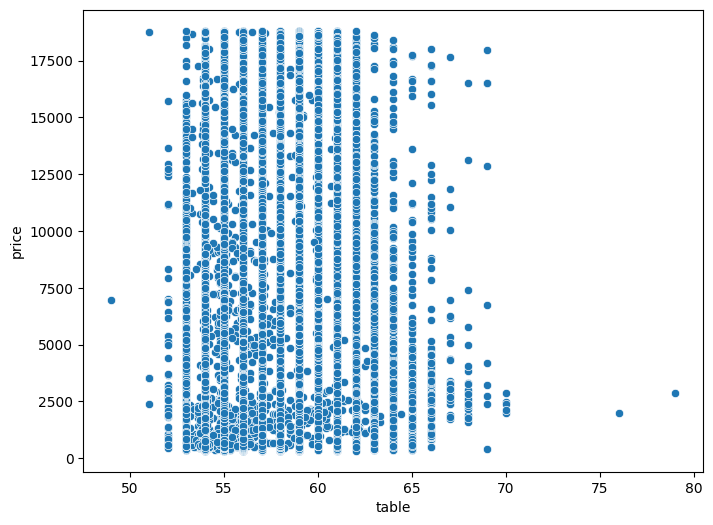

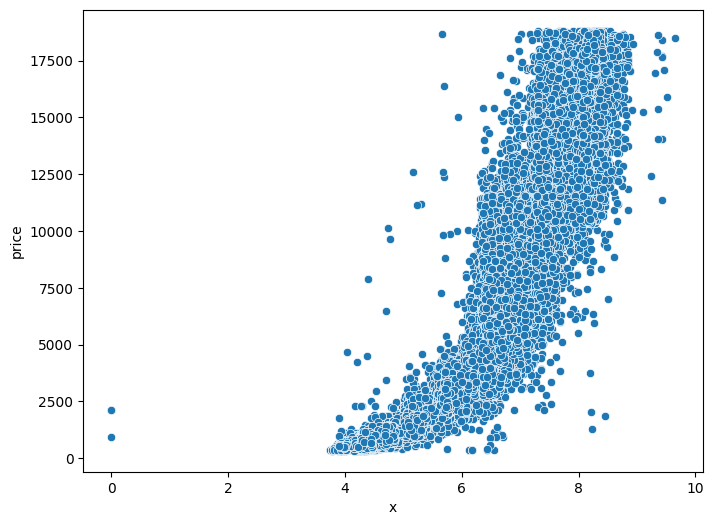

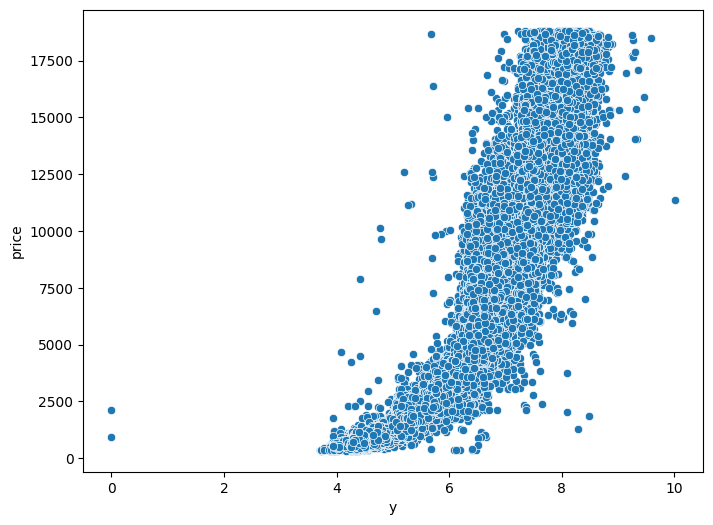

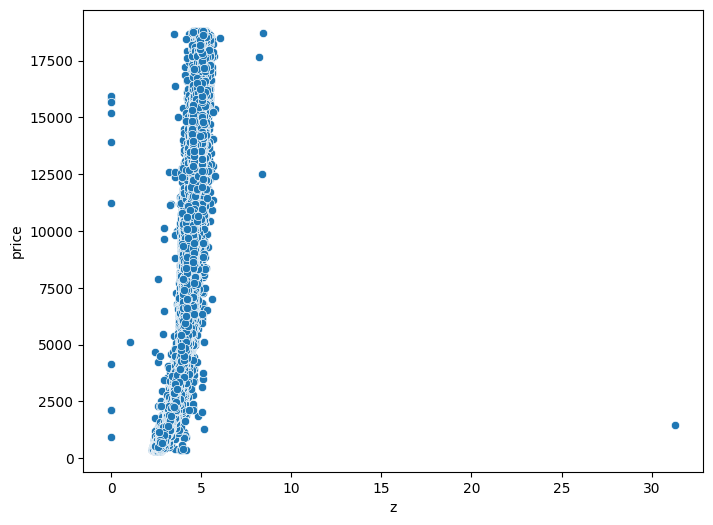

In [63]:
# bivariate analysis
for i in numerical_columns:
    if i != 'price':
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=df[i],y= df['price'])

In [7]:
# Prepaing for the Ordinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"J":1 ,"I":2 ,"H":3 , "G":4 ,"F":5 , "E":6, "D":7}

In [8]:
df1 = df.copy()

In [10]:
df1['cut'] = df1['cut'].map(cut_map)
df1['color'] = df1['color'].map(color_map)
df1['clarity'] = df1['clarity'].map(clarity_map)

<Axes: xlabel='cut', ylabel='price'>

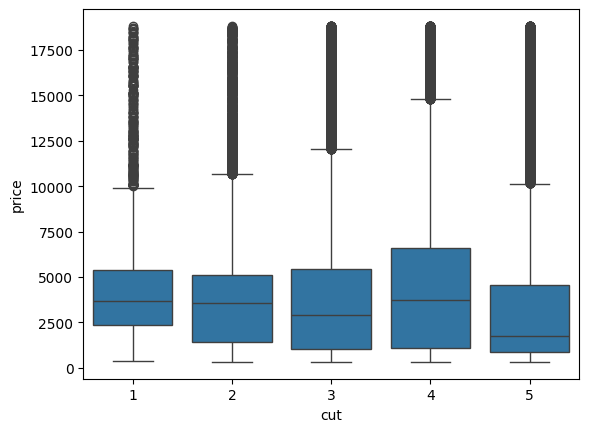

In [11]:
sns.boxplot(x= df1['cut'],y= df1['price'])

<Axes: xlabel='color', ylabel='price'>

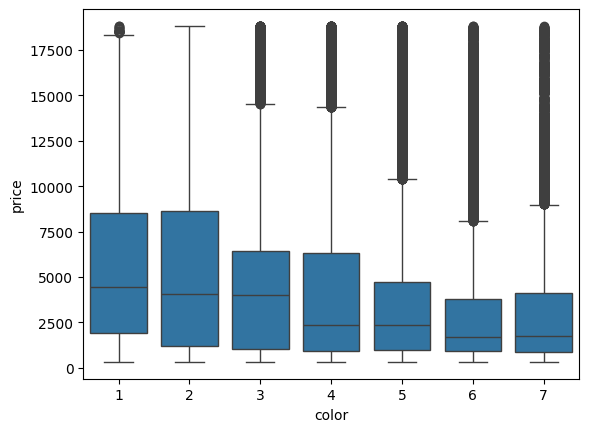

In [12]:
sns.boxplot(x= df1['color'],y= df1['price'])

<Axes: xlabel='clarity', ylabel='price'>

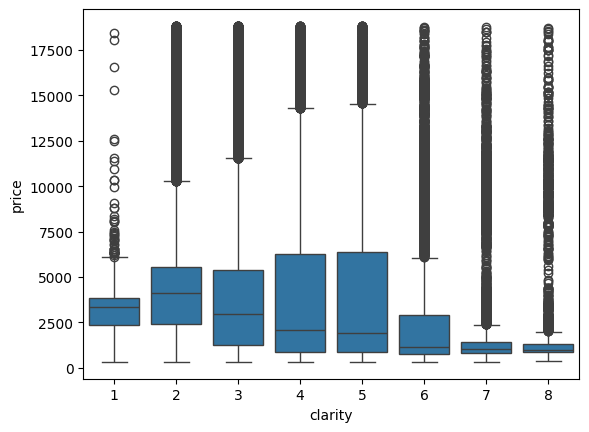

In [13]:
sns.boxplot(x= df1['clarity'],y= df1['price'])

### **Insights from Univariate and Bivariate Analysis**

#### **Step 3: Univariate Analysis**
1. **Price Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `Price` is highly positively skewed, with the majority of house prices falling below `$5000`. The peak frequency is around the `$1500`.

   - **Implication**: This skewness suggests that most diamonds in the dataset are relatively affordable, with fewer high-end diamonds. The long tail on the right side indicates a small number of more expensive diamonds, which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution).

2. **Cut Distribution (Categorical Feature)**:
   - **Insight**: The `cut` feature shows a varied distribution, with `ideal` being the most common cut category, followed by `premium` and `very good`. Some cut categories have very few observations like `fair`.
   - **Implication**: The high frequency of certain diamond cut categories suggests that these categories could significantly influence overall diamond prices. Diamonds with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.

#### **Step 4: Bivariate Analysis**

1. **Carat vs. Price (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `carat` and `Price`, indicating that high carat generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers where low carat diamonds are costlier than high carat diamonds.
   - **Implication**: This linear relationship confirms that `carat` is likely a strong predictor of diamond `Price`. However, the presence of outliers (low carat diamonds with high price than higher carat diamonds) might require further investigation to determine whether they should be treated or removed.

2. **Depth vs. Price (Numerical vs. Numerical)**:
   - **Insight**: There is low relationship between `depth ` and `Price`. Depth has vary limited effect on diamond price
   - **Implication**: `depth` does not seem to be a good predictor of the diamond price. We may consider to removing this feature.

   **Table vs. Price (Numerical vs. Numerical)**:
   - **Insight**: There is low relationship between `table ` and `Price`. table also has vary limited effect on diamond price
   - **Implication**: `table` may not be a good predictor of the diamond price.

   **x,y,z vs. Price (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `x`,`y`, `z` and `Price`, indicating that high values generally sell for higher prices. The relationship appears mostly linear
   - **Implication**: This linear relationship confirms that `x`,`y`, `z` is likely a strong predictor of diamond `Price`.

   **cut vs. Price (Categorical vs. Numerical)**:
   - **Insight**: There is a  positive correlation between `cut` and `Price` with exception of `ideal category`.
   - **Implication**: This  relationship confirms that `cut` is likely a good predictor of diamond `Price`.


   


 


In [19]:
# Multivariate Analysis

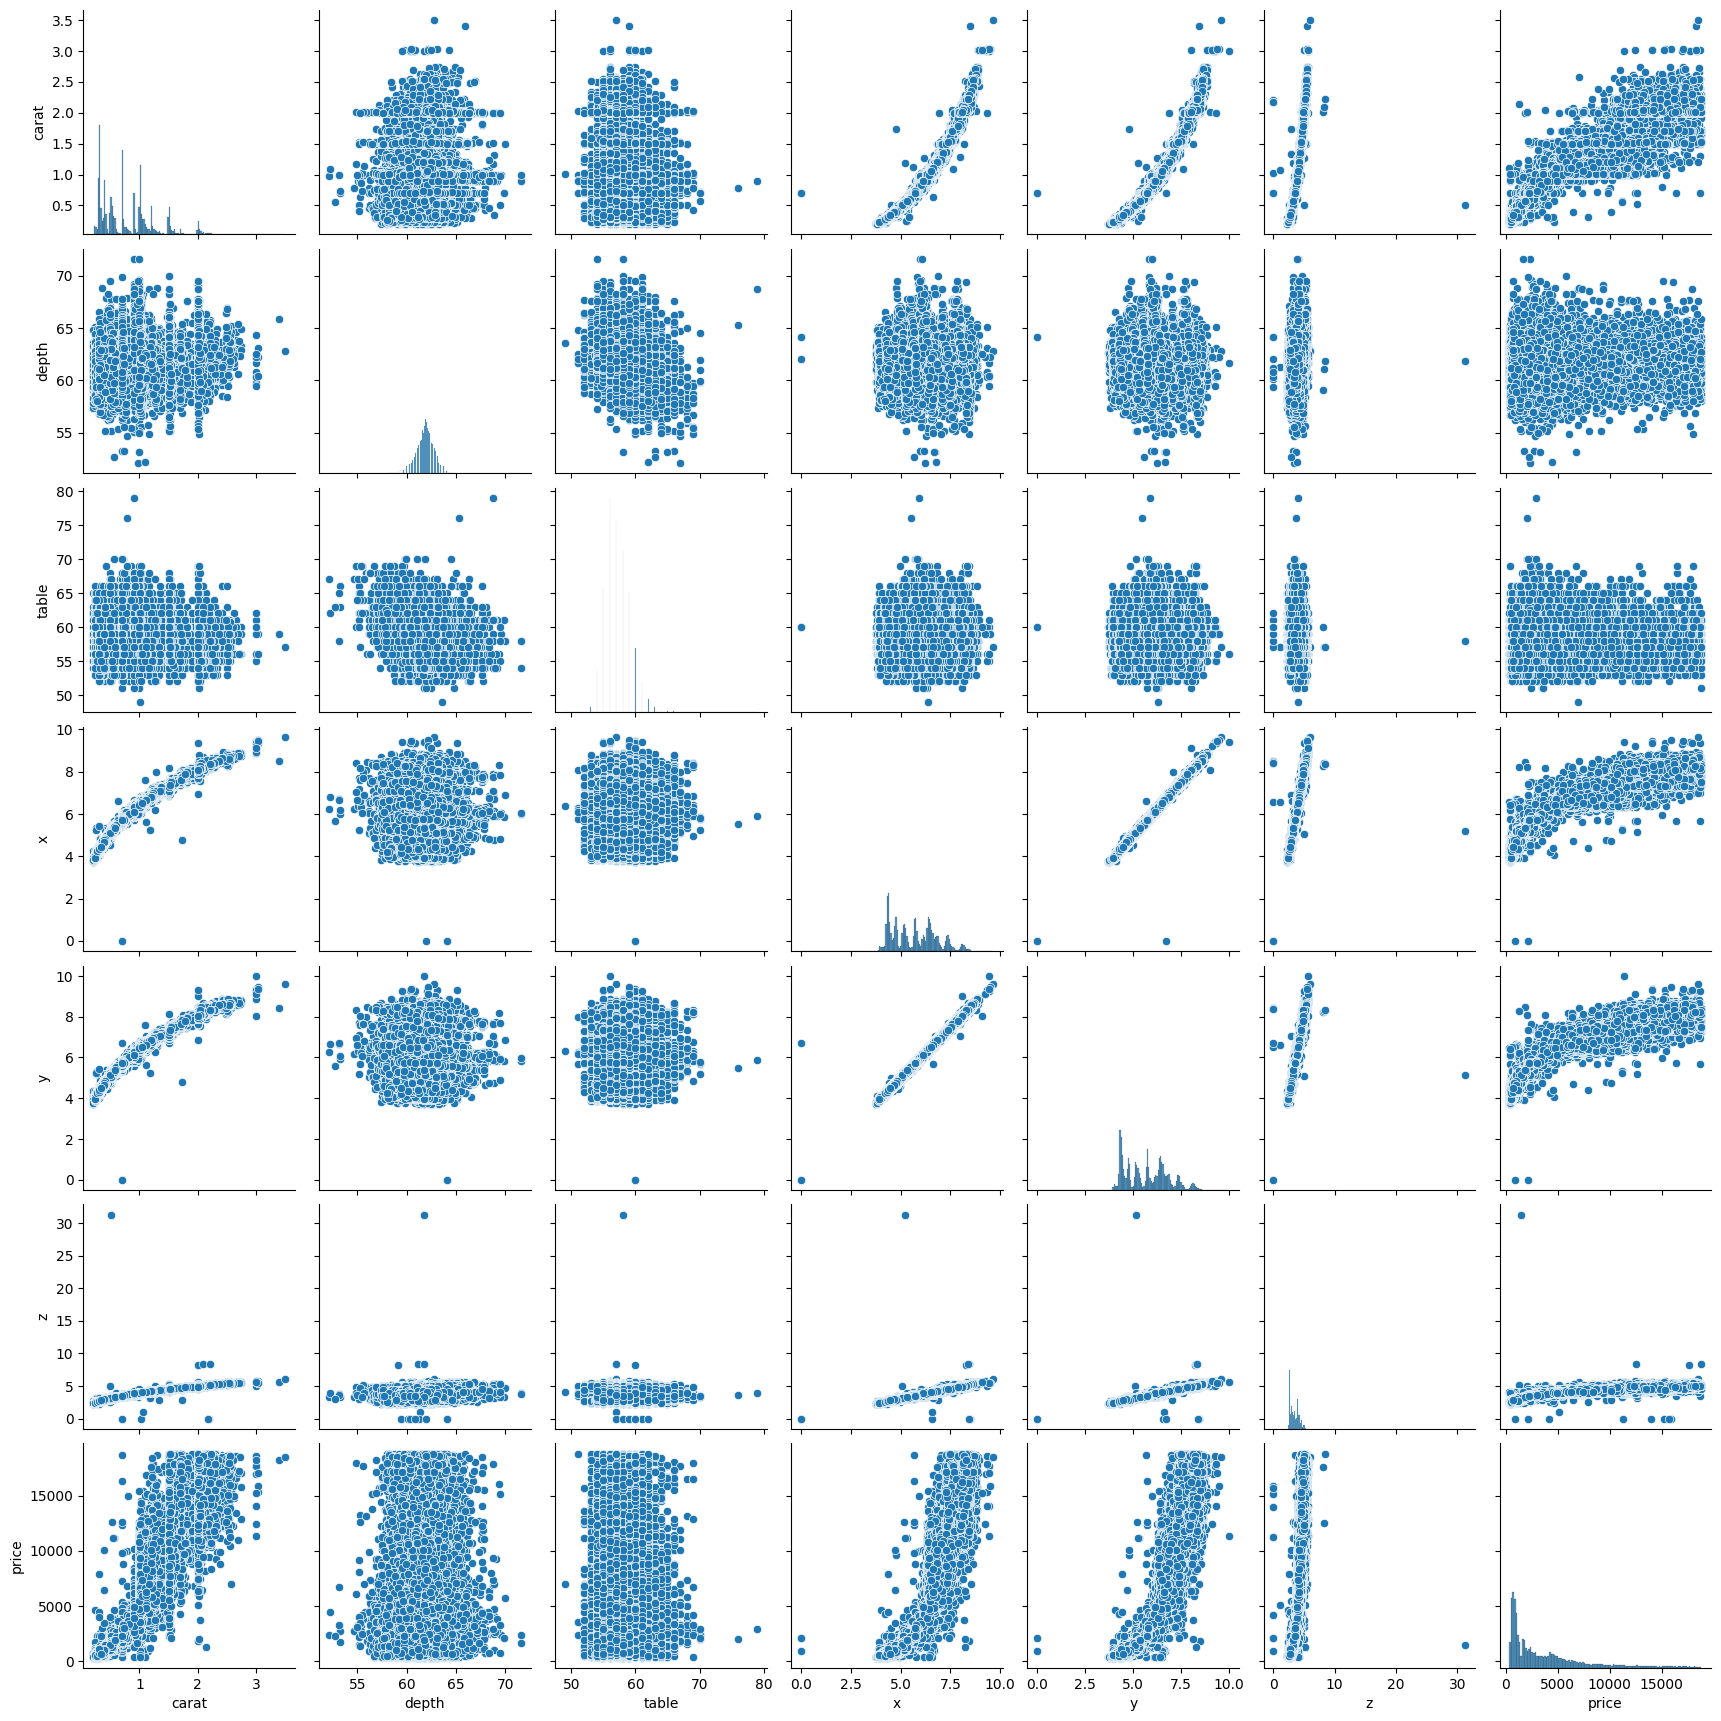

In [18]:
sns.pairplot(df)

In [16]:
df[numerical_columns].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

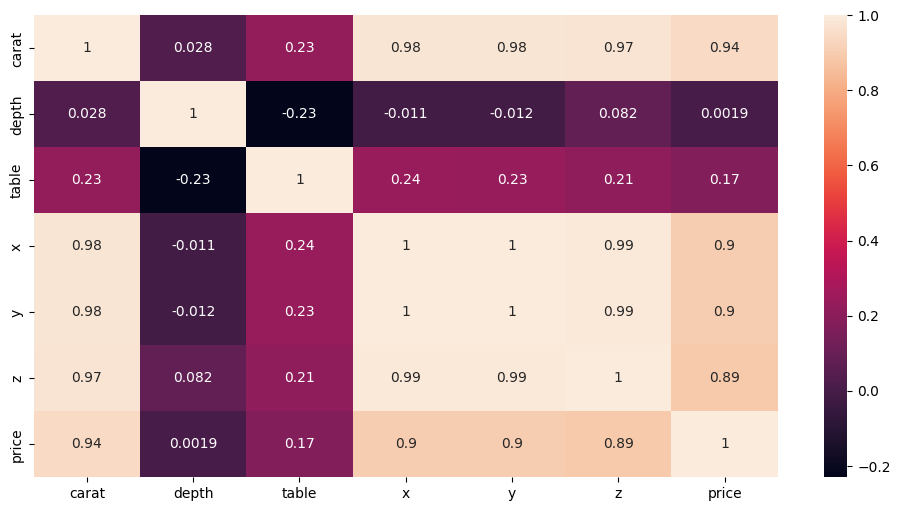

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df[numerical_columns].corr(), annot=True)

### **Insights from Multivariate Analysis**

#### **Correlation Heatmap:**
1. **Carat and Price**:
   - **Insight**: There is high correlation between `carat` and `price` (0.94). This strong positive correlation indicates that the carat value is a significant determinant of diamonds price. 
   - **Implication**: `carat` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **Depth and Price**:
   - **Insight**: There is very low correlation between `depth` and `price` (0.0019). This very low  positive correlation indicates that the depth value has minimal affect on diamonds price. 
   - **Implication**: Since there is very low correlation between `depth` and `price`, we may consider removing this feature.

3. **Table and Price**:
   - **Insight**: There is low correlation between `table` and `price` (0.17). This low positive correlation indicates that the table value has some affect on diamonds price. 
   - **Implication**: We should keep this feature as it has effect on the price.

#### **Pair Plot:**
1. **Linear Relationships**:
   - **Insight**: The pair plots confirm linear relationships between `Price` and `carat`, supporting their inclusion as linear predictors in the model.
   - **Implication**: These linear relationships suggest that linear models (or transformations) could effectively capture these predictors' contributions to `SalePrice`.

#### **Multicollinearity**:
- **Insight**: The strong correlations between `carat`, `x`, `y` and `z` suggest potential multicollinearity, which could inflate variance in model coefficients.
- **Implication**: Multicollinearity should be checked using Variance Inflation Factor (VIF) analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Principal Component Analysis (PCA) might be needed.

